# 領域(輪郭)の属性情報
ここでは物体の特徴を表す時によく使われる輪郭の属性情報(ソリディティ, 等価直径, マスク画像，平均値など)について学ぶ． より詳細な情報については<A HREF="http://www.mathworks.in/help/images/ref/regionprops.html" target="_blank"> Matlab regionprops documentation </A>を参照すること．

<font color="blue">Note</font> : 重心，面積，周囲長なども輪郭の属性情報であるが，これらについては前のチュートリアルで既に扱った)

## 1. アスペクト比(Aspect Ratio)
アスペクト比とは、物体を囲む外接長方形の縦幅(height)に対する横幅(width)の比のことである．

$ Aspect \; Ratio = \frac{Width}{Height}$



In [1]:
#このコードは『領域の特徴」で用いたもの
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('target.png')

im =  cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(im,127,255,0)
imgEdge,contours,hierarchy = cv2.findContours(thresh, 1, 2)

cnt = contours[0]

In [4]:
x,y,w,h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h
print(aspect_ratio)

1.0909090909090908


## 2. エクステント(Extent)
エクステントとは外接矩形の面積に対する輪郭が占める面積の比のことである．

$Extent = \frac{Object \; Area}{Bounding \; Rectangle \; Area}$

In [5]:
area = cv2.contourArea(cnt)
x,y,w,h = cv2.boundingRect(cnt)
rect_area = w*h
extent = float(area)/rect_area
print(extent)

0.29611194590533435


## 3. ソリディティ(Solidity)
ソリディティとは凸包(領域を囲む最小の外接多角形)の面積に対する輪郭の面積の比のことをいう．

$Solidity = \frac{Contour \; Area}{Convex \; Hull \; Area}$

In [6]:
area = cv2.contourArea(cnt)
hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)
solidity = float(area)/hull_area
print(solidity)

0.8308300395256917


## 4. 等価直径(Equivalent Diameter)
等価直径とは、輪郭の面積と同じ面積を持つ円の直径のことをいう．

$Equivalent \; Diameter = \sqrt{\frac{4 \times Contour \; Area}{\pi}}$

In [7]:
area = cv2.contourArea(cnt)
equi_diameter = np.sqrt(4*area/np.pi)
print(equi_diameter)

77.60017027574716


## 5. 傾き(Orientation)
傾きとは物体が向いている方向を意味する．以下の計算方法で長径(MA: Major Axis)と短径(ma: Minor Axis)も同時に計算できる．

In [9]:
(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)
print((x,y),(MA,ma),angle)

(140.046875, 138.21986389160156) (49.31149673461914, 162.16934204101562) 134.79702758789062


## 6. マスク(Mask)と画素点(Pixel Points)
マスク(Mask)とは物体が占める領域とそれ以外の領域を区別するためのもの。また画素点(Pixel Point)とはマスクを構成する全ての点を指す．物体を構成する全ての点の情報が必要になる時は，以下のようにする:

In [11]:
mask = np.zeros(im.shape,np.uint8)
cv2.drawContours(mask,[cnt],0,255,-1)
pixelpoints = np.transpose(np.nonzero(mask))
#pixelpoints = cv2.findNonZero(mask)
print(pixelpoints)

[[ 87 127]
 [ 87 128]
 [ 88 125]
 ...
 [206 206]
 [207 204]
 [207 205]]


3行目と4行目はそれぞれNumpyの関数とOpenCVの関数を使っているが，全く同じ処理である．結果も同じ結果が得られるが，若干の違いがある．Numpyは座標を `(row, column)` の形式で出力するのに対し，OpenCVは `(x,y)` の形式で出力する．そのため，それぞれの結果は置き換えられる．ここで `row = x` と `column = y` という関係になる．

## 7. 最大値，最小値とその位置
画像(対象領域)における画素値の最大値，最小値及び対応する画素の位置を調べるには以下のようにする．

In [12]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(imgray,mask = mask)
print(min_val, max_val, min_loc, max_loc )

255.0 255.0 (127, 87) (127, 87)


## 8. 平均色と平均値
物体の平均色の計算も可能である．グレースケール画像であれば平均値になる．マスクを指定すると，注目領域を対象として計算する．

In [13]:
mean_val = cv2.mean(im,mask = mask)
print(mean_val)

(255.0, 0.0, 0.0, 0.0)


## 9. 端点(Extreme Points)
端点とは物体の上橋(topmost)，下端(bottommost)，右端(rightmost)，左端(leftmost)の点を意味する．
```
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])
```

例えばインドの地図に対して端点を求めると，以下のようになる: (<A HREF="http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/py_tutorials/py_imgproc/py_contours/py_contour_properties/india.png">インドの地図</A>)

x = 8, y = 3, w = 269, h = 295
aspect_ratio = 0.911864
extent = 0.369517
solidity = 0.645327
equi_diameter = 193.223195
x = 129, y = 132, MA = 199, ma = 281, angle =29.772797
min_val=0, max_val=255
min_loc = (115, 4)  max_loc = (113, 3)
mean val =  (20.946675136237506, 179.09351074855405, 122.919059877637, 0.0)


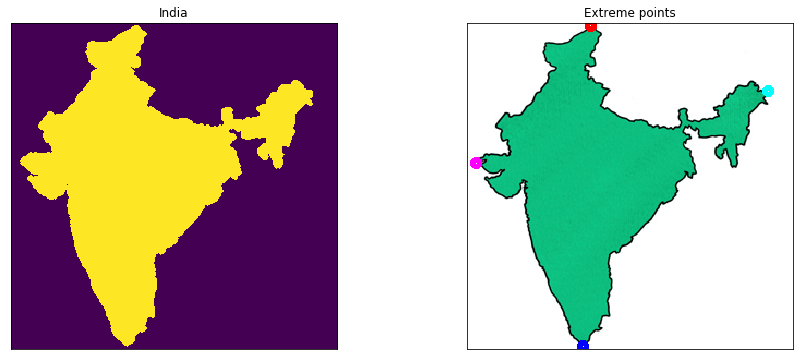

In [15]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

im = cv2.imread("india.png")
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[1]

###########

x,y,w,h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h

print("x = %d, y = %d, w = %d, h = %d"%(x,y,w,h))
print("aspect_ratio = %f"%aspect_ratio)

###
area = cv2.contourArea(cnt)
x,y,w,h = cv2.boundingRect(cnt)
rect_area = w*h
extent = float(area)/rect_area
print("extent = %f"%extent)

####
area = cv2.contourArea(cnt)
hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)
solidity = float(area)/hull_area
print("solidity = %f"%solidity)

####

area = cv2.contourArea(cnt)
equi_diameter = np.sqrt(4*area/np.pi)
print("equi_diameter = %f"%equi_diameter)

####

(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)
print("x = %d, y = %d, MA = %d, ma = %d, angle =%f"%(x,y, MA, ma, angle))

####
mask = np.zeros(imgray.shape,np.uint8)
cv2.drawContours(mask,[cnt],0,255,-1)
pixelpoints = np.transpose(np.nonzero(mask))
#pixelpoints = cv2.findNonZero(mask)

####
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(imgray,mask = mask)
print("min_val=%d, max_val=%d"%(min_val, max_val))
print("min_loc =",min_loc, " max_loc =",  max_loc)

####

mean_val = cv2.mean(im,mask = mask)
print("mean val = ", mean_val)

####

leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

cv2.circle(im, leftmost,3,(255,0,255),3)
cv2.circle(im, rightmost,3,(0,255,255),3)
cv2.circle(im, topmost,3,(255,0,0),3)
cv2.circle(im, bottommost,3,(0,0,255),3)

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.imshow(mask)
plt.title('India'),plt.xticks([]),plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(im)
plt.title('Extreme points'),plt.xticks([]),plt.yticks([])

plt.show()


## 課題
このチュートリアルで紹介したもの以外に，MatLabの領域に関する属性情報はまだまだある。自分で実装してみよ．

## 目次
* [最初に戻る]( http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/usingOpenCV.html )
* [OpenCVにおける輪郭(領域)]( http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/contours.html)
* 前の学習項目 [領域(輪郭)の特徴 contourFeatures.ipynb](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/contourFeatures.html)<BR>
輪郭(領域)の様々な特徴(面積，周囲長，外接矩形など)を学ぶ．
* 次の学習項目 [輪郭に関するいろいろな関数 contourMoreFunctions.ipynb](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/contourMoreFunctions.html)<BR>
凸性の欠陥（convexity defects）， 多角形近似のテスト，形状のマッチング等について学ぶ．